In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

import graph_factory
import work_emulator
import normal_distribution_printer
import monte_carlo_simulation
import data_preprocessing

%matplotlib inline

In [15]:
def emulate(file_with_tasks, number_of_devs):
    df = pd.read_csv(file_with_tasks, encoding = "ISO-8859-1")
    df1 = df.replace(np.nan, '', regex=True)
    
    estimated_G = graph_factory.build_graph(data_preprocessing.filter_estimated_tasks(df))
    estimated_df = data_preprocessing.prepare_data_for_calculation_of_normal(df)
    
    print('===========================================================================================')
    print('==========================Emulation with only normal estimation usage======================')
    print('===========================================================================================')
    print(work_emulator.calculate_requered_days(NUMBER_OF_DEVS, estimated_df.values, estimated_G, True))
    
    full_estimated_df = data_preprocessing.prepare_data_with_all_estimations(df)
    generations_result = monte_carlo_simulation.run_simulation(NUMBER_OF_DEVS, 100, full_estimated_df, estimated_G)
    
    total_mean = np.mean(generations_result)
    total_std = np.std(generations_result)
    
    print('===========================================================================================')
    print('===================================Monte Carlo emulation===================================')
    print('===========================================================================================')
    normal_distribution_printer.print_normal_cumulative_distribution(total_mean, total_std, 'Total')

==========================Emulation with only normal estimation usage======================
set()
{'TASK-12', 'TASK-17', 'TASK-11', 'TASK-6', 'TASK-5', 'TASK-16', 'TASK-1'}
{'TASK-12', 'TASK-17', 'TASK-11', 'TASK-6', 'TASK-5', 'TASK-16', 'TASK-1'}
{'TASK-12', 'TASK-17', 'TASK-11', 'TASK-5', 'TASK-16', 'TASK-1'}
{'TASK-11', 'TASK-5', 'TASK-16', 'TASK-1'}
{'TASK-11', 'TASK-5', 'TASK-16', 'TASK-1'}
{'TASK-2', 'TASK-5', 'TASK-3', 'TASK-16'}
{'TASK-2', 'TASK-5', 'TASK-3', 'TASK-16'}
{'TASK-2', 'TASK-5', 'TASK-3', 'TASK-16'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-5', 'TASK-3'}
{'TASK-5', 'TASK-3'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-7', 'TASK-4', 'TASK-13'}
{'TASK-7', 'TASK-4', 'TASK-13'}
{'TASK-7', 'TASK-4', 'TASK-13'}
{'TASK-7', 'TASK-4', 'TASK-13'}
{'TASK-7', 'TASK-4', 'TASK-13'}
{'TASK-4', 'TASK-9', 'TASK-8',

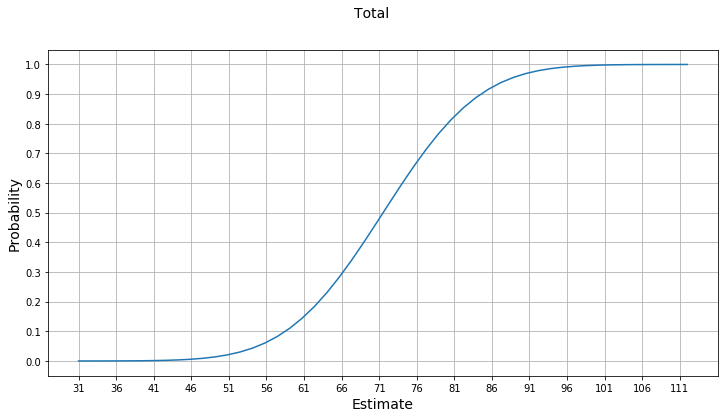

In [16]:
emulate(file_with_tasks='tasks.csv', number_of_devs=10)